In [3]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 80%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [1]:
import pandas as pd
import numpy as np
from time import sleep as delay
import re
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import datetime
import json
import ast
import pandas.io.json as pdj
from scipy.signal import lfilter
from scipy.signal import savgol_filter

In [2]:
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

In [ ]:
from email.mime import base
import os
import time
import sys
import logging

import time


fig, ((ax3, ax4), (ax5, ax6)) = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Global Data Plotter')
fig.subplots_adjust(hspace=.3)
#fig = plt.figure()
#ax = fig.add_subplot(3, 1, (1, 2))

filename = "test5142-clean.txt"

dfSerial = pd.DataFrame()
local = list()



def readSerialData():
    global dfSerial
    # Send get request
    global baseTime
    tZero = 0
    gotTzeroYet = False
        
    with open(filename, "rb") as file:
        reqText = None
        try:
            while True:
                try:
                    file.seek(-2, os.SEEK_END)
                    while file.read(1) != b'\n':
                        file.seek(-2, os.SEEK_CUR)
                except:
                    file.seek(0)
                reqText = file.readline().decode().replace("\n", "").replace("\r", "")
                dicData = json.loads(reqText)
                if not gotTzeroYet:
                    tZero = float(dicData["time(s)"])
                    gotTzeroYet = True
                #print(dicData)
                try:
                    dfSerial = dfSerial.append(dicData,ignore_index=True)
                    #do matplotlib stuff here
                    #print(dicData)
                    #ax.set_ylim([0, 15])
                    
                    #start_time = time.time()
                    timeShifted = dfSerial["time(s)"]-tZero
                    
                    x_in = float(timeShifted.iloc[-1])-10
                    x_out = float(timeShifted.iloc[-1])+10    
                    
                    '''
                    ax1.clear()
                    ax1.plot(timeShifted, dfSerial['LoadCell1(RAW)'], color ='b')
                    ax1.set_title('Load Cell 2')
                    ax1.set_xlabel('time(s)')
                    ax1.set_ylabel('load')
                    ax1.ticklabel_format(useOffset=False, style='plain')
                    ax1.set_xlim([x_in,x_out])
                    
                    ax2.clear()
                    ax2.plot(timeShifted, dfSerial['LoadCell2(RAW)'], color ='r')
                    ax2.set_title('Load Cell 2 (RAW)')
                    ax2.set_xlabel('time(s)')
                    ax2.set_ylabel('load')
                    ax2.ticklabel_format(useOffset=False, style='plain')
                    ax2.set_xlim([x_in,x_out])
                    '''
                    try:
                        ax3.clear()
                        ax3.plot(timeShifted, dfSerial['OxTank(Psi)'], color ='r')
                        ax3.set_title('Ox. Tank Pressure')
                        ax3.set_xlabel('time(s)')
                        ax3.set_ylabel('pressure(psi)')
                        ax3.ticklabel_format(useOffset=False, style='plain')
                        ax3.set_xlim([x_in,x_out])
                    except:
                        print("ax3 failed")
                    
                    try:
                        ax4.clear()
                        ax4.plot(timeShifted, dfSerial['Is Firing'], color ='r')
                        ax4.set_title('Firing State')
                        ax4.set_xlabel('time(s)')
                        ax4.set_ylabel('State (On/Off)')
                        ax4.ticklabel_format(useOffset=False, style='plain')
                        ax4.set_xlim([x_in,x_out])
                    except:
                        print("ax4 failed")
                    
                    try:
                        ax5.clear()
                        ax5.plot(timeShifted, dfSerial['timeSinceLastCalibration'], color ='r')
                        ax5.set_title('Time Since Last Calibration')
                        ax5.set_xlabel('time(s)')
                        ax5.set_ylabel('time(s)')
                        ax5.ticklabel_format(useOffset=False, style='plain')
                        ax5.set_xlim([x_in-20,x_out])
                    except:
                        print("ax5 failed")
                    local.append(1.0/(time.time() - start_time)) ##Error in FPS Graph occurs here
                    
                    try:
                        ax6.clear()
                        ax6.plot(timeShifted, local, color ='r')
                        ax6.set_title('FPS Counter')
                        ax6.set_xlabel('time(s)')
                        ax6.set_ylabel('fps(frames per second)')
                        ax6.ticklabel_format(useOffset=False, style='plain')
                        ax6.set_xlim([x_in,x_out])
                    except:
                        print("ax6 failed")
                    #ax.plot(dfSerial['time(s)'], dfSerial['OxTank(Psi)'], color ='b')
                    #ax.plot(dfSerial['time(s)'], dfSerial['Is Firing']*20, color ='magenta')
                    #ax.plot(dfSerial['time(s)'], dfSerial['Is PyroValving']*20, color ='yellow')
                    
                    fig.canvas.draw()               
                    
                except Exception as e:
                    print(
                        "Error ocurred while trying to read response:" + str(e))
                    print(f'Plot ax3 shape {ax3.shape}')
                    print(f'Plot ax4 shape {ax4.shape}')
                    print(f'Plot ax5 shape {ax5.shape}')
                    print(f'Plot ax6 shape {ax6.shape}')
                #time.sleep(0.001)
        except Exception as e:
            print(
                "Error broke down reading routine:" + str(e))
            
readSerialData()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
num_plots = 0
df = pd.DataFrame()
dataLines = []



with open('test3-clean.txt') as f:
    rawlines = f.readlines()
    rawlines = [i.replace("\n","") for i in rawlines]
    rawlines = [i for i in rawlines if i != "null"]
    dataLines = [json.loads(i) for i in rawlines]

for lineIndex,line in enumerate(dataLines):
    start_time = time.time()
    df = df.append(line,ignore_index=True)
    #print(df)
    
    df['time(s)'] = df['time(s)'][-1] - df['time(s)'][0]
    
    ax.clear()

    ax.set_ylim([0, 50])
    ax.set_title('Tank Pressure')
    ax.set_xlabel('time(s)')
    ax.set_ylabel('pressure(psi)')

    ax.plot(df['time(s)'], df['OxTank(Psi)'], color ='b')
    ax.set_xlim([float(df['time(s)'].iloc[-1])-10,float(df['time(s)'].iloc[-1])+10])
    ax.ticklabel_format(useOffset=False, style='plain')
    #plt.xticks(rotation=20)
    fig.canvas.draw()

    num_plots += 1
    print("fps: ", 1.0/(time.time() - start_time))
    #delay(1)
    #print(type(df['time(s)']))
    #print()
    #print('time(s): ', df['time(s)'])
    #print()


<IPython.core.display.Javascript object>


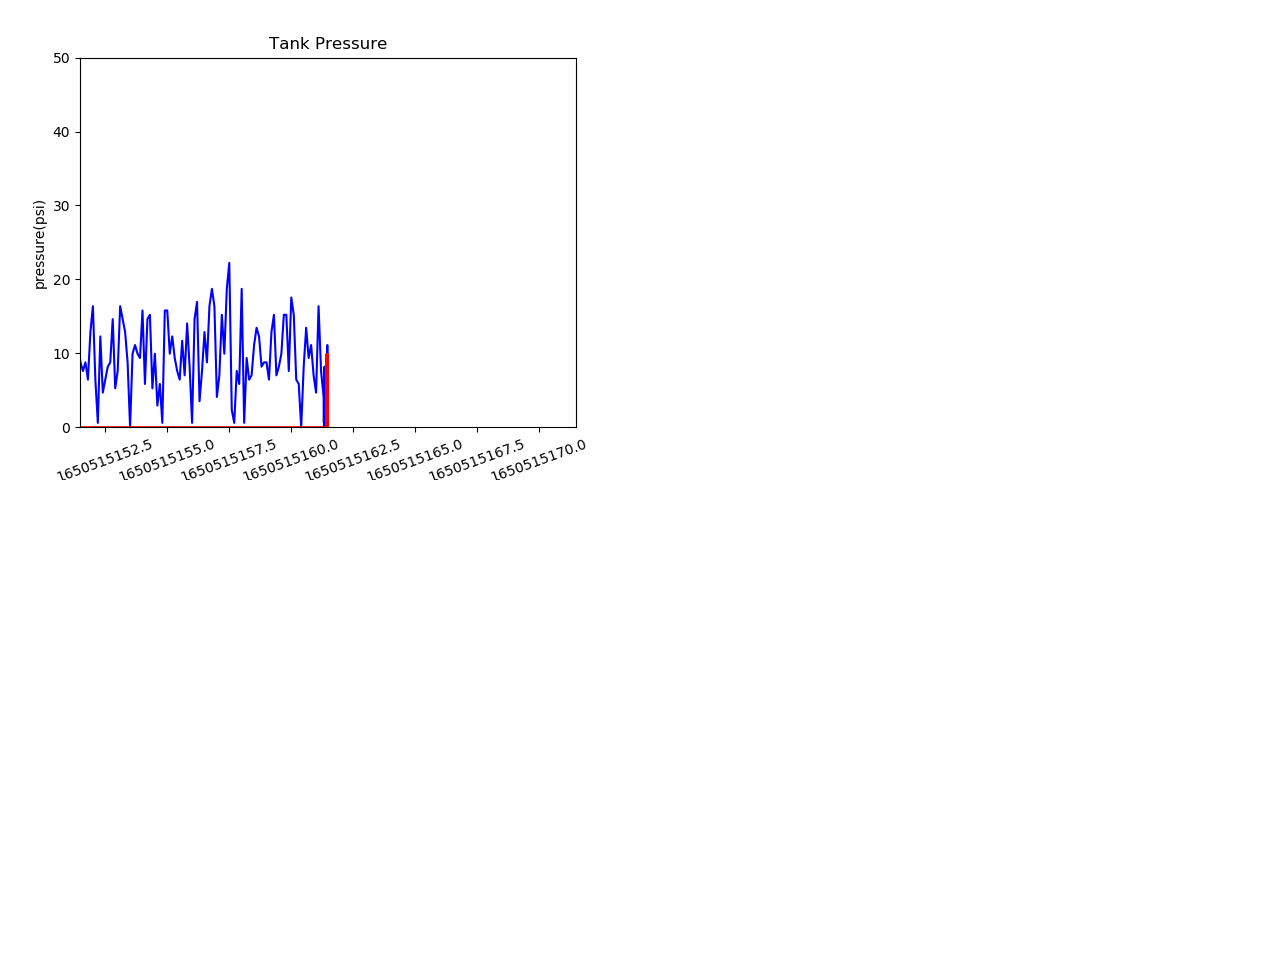

fps:  7.417258642672849
fps:  8.286649069844632
fps:  10.870437610957769
fps:  9.83023104290395
fps:  10.902224994801413
fps:  10.336908517350158
fps:  10.333546854828379
fps:  10.444530216968516
fps:  10.665798681747905
fps:  9.928380707103225
fps:  10.898627246672055
fps:  10.336883041987772
fps:  10.3400429448004
fps:  10.441280146575588
fps:  10.554496156217366
fps:  9.829954580183086
fps:  10.554071226010352
fps:  10.666883684970804
fps:  10.128526857727936
fps:  10.34009392680612
fps:  11.015350514353846
fps:  10.554974243602423
fps:  10.557551349174386
fps:  11.013875321674282
fps:  10.67144311011602
fps:  10.89848565162712
fps:  11.014829812992565
fps:  10.131120139516234
fps:  10.781579590000643
fps:  10.781441019972753
fps:  10.336322615782327
fps:  10.554841437206516
fps:  11.1411374080272
fps:  10.444140101694746
fps:  11.018186307861644
fps:  10.66691081287973
fps:  10.444556225689654
fps:  10.66685655719986
fps:  11.265985850044856
fps:  10.44107221093719
fps:  10.7811916

KeyboardInterrupt: 

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

num_plots = 0

df = pd.DataFrame(columns = ["time(s)", "OxTank(Psi)", "CombChamber(Psi)", "LoadCell1(RAW)", "LoadCell2(RAW)", "statusByte", "Is Filling", "Is Bleeding", "Is Releasing", "Is PyroCutting", "Is PyroValving", "Is Igniting", "Is Firing", "timeSinceLastCalibration", "extraStatus"])


with open("test3-clean.txt", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        array = re.findall(r"(?<=: )[^,|}]*", stripped_line)
        
        if len(array) == 15:
            
            start_time = time.time() # start time of the loop
            df_length = len(df)
            df.loc[df_length] = array
            
            #for i in range(len(df)):
             #   df['time(s)'].iloc[i] = float(df['time(s)'].iloc[i+1] - float(df['time(s)'].iloc[0])
                                              
            ax.clear()
            ax.set_ylim([0, 50])
            ax.set_title('Tank Pressure')
            ax.set_xlabel('time(s)')
            ax.set_ylabel('pressure(psi)')
            ax.plot(df['time(s)'].astype(float), df['OxTank(Psi)'].astype(float), color ='b')
            ax.plot(df['time(s)'].astype(float), df['CombChamber(Psi)'].astype(float), color ='r')
            #ax.plot(float(array[0]), floart(array[1]), color ='r')
            ax.set_xlim([float(df['time(s)'].iloc[-1])-10,float(df['time(s)'].iloc[-1])+10])
            ax.ticklabel_format(useOffset=False, style='plain')
            plt.xticks(rotation=20)
            fig.canvas.draw()
            num_plots += 1
            print("fps: ", 1.0/(time.time() - start_time))
    